<a href="https://colab.research.google.com/github/nabilazy/BK_DataScience/blob/main/BK_Hungarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Bimbingan Karir Data Science

Nama : Nabila Zibriza Farsya

NIM : A11.2020.12530

Kelas : BKDS01

## 1) Pengumpulan Data


Sumber dataset yang digunakan: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang digunakan adalah dataset "hungarian.data"

Deskripsi dataset terdapat di file "heart-disease.names"

Diharapkan membaca deskripsi dataset sebelum memakai dataset


Tahap pengumpulan data adalah tahap mendapatkan dataset yang siap dipakai atau membuat dataset sendiri dengan cara scrapping atau crawling.

Pada tugas ini, dataset didapatkan dari repository publik sesuai link di atas.

## 2) Menelaah Data

Import atau masukkan library yang dibutuhkan untuk menelaah data

In [97]:
import pandas as pd
import re
import numpy as np
import itertools

### Load Data

Upload dataset "hungarian data" ke file colab terlebih dahulu.

Simpan dataset yang akan digunakan dalam bentuk alamat penyimpanan ke dalam sebuah variabel.

In [98]:
dir = 'hungarian.data'

buatlah iterasi untuk membaca dataset

In [99]:
# membuka file "hungarian.data" yang sudah disimpan di variabel dir
with open(dir, encoding='Latin1') as file:
  # membaca dan menghilangkan spasi/tab/newline dari setiap baris, lalu menyimpan nilai setiap baris ke dalam list lines
  lines = [line.strip() for line in file]

In [100]:
# menampilkan 10 baris pertama pada list lines
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

setelah membaca file dataset, lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [129]:
data = itertools.takewhile(lambda x: len(x) == 76,
                           (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
                           )

# lambda x: len(x) == 76 --> fungsi lambda untuk mengecek panjang tiap elemen adalah 76
# (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10)) --> menggabungkan setiap 10 baris/elemen dari list lines menjadi sebuah string yang dipisahkan dengan spasi.
# Lalu, dengan fungsi split, string tersebut diubah menjadi list
# Setiap elemen pada string hasil join yang dipisahkan dengan spasi akan menjadi elemen/string yang berdiri sendiri pada list hasil split()
# itertools.takewhile --> fungsi yang membuat iterator yang mengembalikan nilai dari iterable(generator expression) selama kondisi tertentu bernilai benar

In [123]:
# data_list = list(data)
# print(data_list)

[['1254', '0', '40', '1', '1', '0', '0', '-9', '2', '140', '0', '289', '-9', '-9', '-9', '0', '-9', '-9', '0', '12', '16', '84', '0', '0', '0', '0', '0', '150', '18', '-9', '7', '172', '86', '200', '110', '140', '86', '0', '0', '0', '-9', '26', '20', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '12', '20', '84', '0', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '1', '1', '1', '1', '1', '-9.', '-9.', 'name'], ['1255', '0', '49', '0', '1', '0', '0', '-9', '3', '160', '1', '180', '-9', '-9', '-9', '0', '-9', '-9', '0', '11', '16', '84', '0', '0', '0', '0', '0', '-9', '10', '9', '7', '156', '100', '220', '106', '160', '90', '0', '0', '1', '2', '14', '13', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '11', '20', '84', '1', '-9', '-9', '2', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '1', '1', '1', '1', '1', '-9.', '-9.', 'name'], ['1256', '0', '37', '1', '1', '0', '0', '-9', '2', '130', '0', '283', '-9', '-9', '-9', '0', '-9', '-9', '1'

In [130]:
# membuat dataframe
df = pd.DataFrame.from_records(data)

In [131]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


menampilkan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [133]:
# memilih semua baris dan kolom, kecuali kolom terakhir, kolom terakhir bernilai name
df = df.iloc[:,:-1]

In [134]:
# menghapus kolom pertama pada dataframe df, kolom pertama adalah id pasien
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [135]:
df = df.astype(float)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

## 3) Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

Pada dataset, nilai null direpresentasikan dengan nilai -9.0. Nilai tersebut perlu diubah menjadi null value yang sebenarnya.

In [137]:
# mengganti -9.0 menjadi nilai null
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null di setiap atribut

In [138]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [139]:
# mengecek 5 baris pertama dataset untuk memastikan apakah representasi nilai null sudah sesuai
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## 4) Menentukan Object Data

memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [141]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [142]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [143]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang tertera pada deskripsi dataset

In [144]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [145]:
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-145-e9a4003b4301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Cek apakah dataframe sudah sesuai dengan yang dibutuhkan

In [146]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada dataset

In [147]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

## 5) Membersihkan data

Untuk menghasilkan model yang lebih akurat, pembersihan data perlu untuk dilakukan

menghitung jumlah null values pada dataset yang digunakan

In [148]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan hasil penghitungan jumlah nilai null tiap fitur pada dataset di atas, terdapat 3 fitur yang datanya memiliki nilai null hampir 90%. Oleh karena itu, ketiga fitur tersebut harus dihapus menggunakan fungsi drop

In [149]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [150]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dari hasil di atas, masih terdapat beberapa fitur yang datanya memiliki nilai null. Karena persentase nilai null pada fitur tersebut hanya sedikit, nilai null dapat digantikan dengan nilai mean tiap fiturnya.

In [151]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [152]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

Membulatkan nilai mean

In [153]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanRestCG = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())

Menggantikan nilai null pada tiap fitur dengan masing-masing nilai mean yang sudah dihitung di atas

In [154]:
fill_values = {'tresbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [155]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [156]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Mengecek data duplikat

In [157]:
duplicate_rows = dfClean.duplicated()

In [158]:
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
289    False
290    False
291    False
292    False
293    False
Length: 294, dtype: bool

In [159]:
# melihat baris data yang merupakan data duplikat
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [160]:
# menampilkan semua baris data yang merupakan data duplikat
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data duplikat

In [161]:
dfClean = dfClean.drop_duplicates()
print("'All Duplicates Rows:")
dfClean[dfClean.duplicated(keep=False)]

'All Duplicates Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [162]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [163]:
# menghitung banyak value untuk setiap nilai target
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Visualisasi data untuk mencari korelasi antar fitur

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246570,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082549,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081507,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246570,0.082549,0.081507,1.000000,0.080868,0.096252,0.011199,-0.181824,0.211709,0.204747,0.215093
chol,0.087101,0.027695,0.134697,0.080868,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096252,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011199,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211709,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204747,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

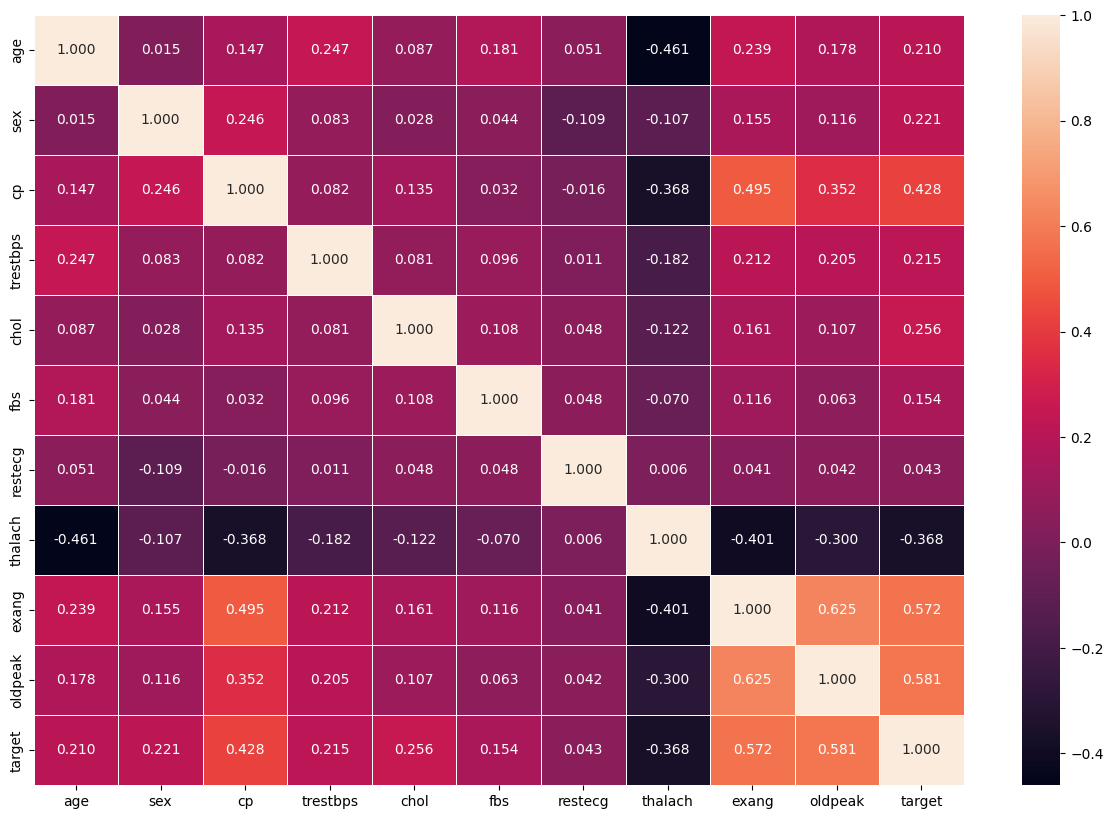

In [166]:
cor_mat = dfClean.corr()
fix,ag = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")